In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem import AllChem
import sys
sys.path.append('/home/zxhuang/ugi/covalent_molecule_library')

from mollib_utils import saveXlsxFromFrame

In [2]:
def mol_id2data(mol_id):
    df = pd.read_csv('/home/zxhuang/ugi/covalent_molecule_library/BiDe/ugi/Ugi_component/PASS_BiDe_UC.csv')
    smiles = df[df['id'] == mol_id]['smi'].values[0]
    cas = df[df['id'] == mol_id]['cas'].values[0]
    price_per_gram = df[df['id'] == mol_id]['price_per_gram'].values[0]
    return smiles, cas, price_per_gram

In [5]:
df_ace_on_acid_results = pd.read_csv('TS_ugi_click_united_sampling/results/ace_on_acid_results.csv')
# df_ace_on_aldehyde_results = pd.read_csv('TS_ugi_sampling/results/ace_on_aldehyde_results.csv')
df_ace_on_amine_results = pd.read_csv('TS_ugi_click_united_sampling/results/ace_on_amine_results.csv')
df_ace_on_acid_results

,score,SMILES,Name
0,0.514637,COc1ccc(C(C(=O)NC(C)(C)C)N(C(=O)CCc2cn(Cc3cccc...,bide-uc-1195_bide-uc-955_bide-uc-1140_bide-uc-...
1,0.596331,Cc1cccc(C)c1C(C(=O)NC(C)(C)C)N(C(=O)CCc1cn(Cc2...,bide-uc-1195_bide-uc-994_bide-uc-1140_bide-uc-...
2,0.535370,Cc1cccc(C)c1C(C(=O)NC(C)(C)C)N(C(=O)c1cccc(-c2...,bide-uc-1925_bide-uc-994_bide-uc-1140_bide-uc-...
3,0.591086,CNC(=O)CN(C(=O)CCc1cn(Cc2cccc(O)n2)nn1)C(C(=O)...,bide-uc-1195_bide-uc-994_bide-uc-1140_bide-uc-...
4,0.630530,CC(C)(C)NC(=O)C(N(C(=O)CCc1cn(Cc2cccc(O)n2)nn1...,bide-uc-1195_bide-uc-657_bide-uc-1140_bide-uc-...
...,...,...,...
1995,0.629497,COc1cccc(C)c1C(C(=O)NC(C)(C)C)N(C(=O)c1cccc(-c...,bide-uc-1925_bide-uc-4351_bide-uc-1140_bide-uc...
1996,0.261743,CCC(C)C(C(=O)NCc1ccccc1)N(C(=O)CCc1cn(Cc2cccc(...,bide-uc-1195_bide-uc-160_bide-uc-1858_bide-uc-...
1997,0.624425,CCC(C)C(C(=O)NC(C)(C)C)N(C(=O)c1cccc(-c2cn(Cc3...,bide-uc-1925_bide-uc-160_bide-uc-1140_bide-uc-...
1998,0.330289,CCC(C)C(C(=O)NCc1ccccc1)N(C(=O)CCc1cn(Cc2cccc(...,bide-uc-1195_bide-uc-160_bide-uc-1858_bide-uc-...


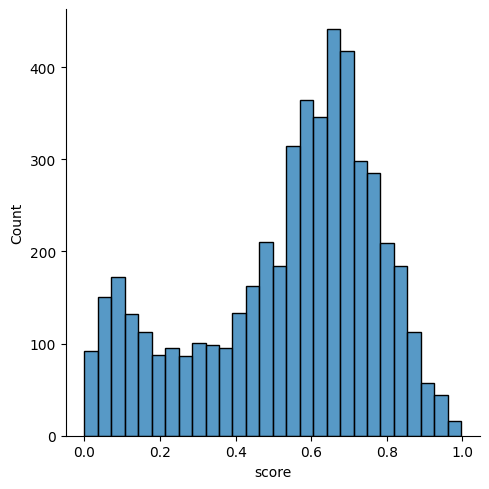

In [5]:
sns.displot(df_ace_on_acid_results, x='score')

## generate triazole and predict the activity of the molecule

In [13]:
from chemprop.train import make_predictions, load_model
from chemprop.args import PredictArgs, get_checkpoint_paths

args = PredictArgs()
# args.checkpoint_dir = "/home/zxhuang/modular_click/machine_learning/chemprop_project_rescreen/opted_results/doc_1_2_3_4/scaffoldkeys_cats2d_qmdesc/scaffold_balanced_noTest"
args.checkpoint_paths = get_checkpoint_paths(checkpoint_dir="/home/zxhuang/modular_click/machine_learning/chemprop_project_rescreen/opted_results/doc_1_2_3_4/scaffoldkeys_cats2d_qmdesc/scaffold_balanced_noTest")
# print(args.checkpoint_paths)
args.no_features_scaling = False
args.gpu = 0
args.preds_path = "./preds.csv"
args.cal_qmdesc = True
args.features_generator =  ["scaffoldkeys", "cats2d"]
mpnn_model = load_model(args=args)

Loading training args
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Moving model to cuda
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Moving model to cuda
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Moving model to cuda
Loading pretrained parameter "encoder.encoder.0.cached_zero_

In [14]:
ugi_ace_on_amine_click_rxn_smarts = "[C:1](=O)[OH,O-].[CH1:2]=O.[N+:3]#[C-:4].([NH2X3,NH3X3,NH3+X4,NH4+X4;!$(NC=[C,O,N,S]);!$(N[#6]:[#7]);!$(N[#5,#7,#8,#15,#16]):5].[C:7]#[CH1:8]).[N-:9]=[N+:10]=[N:11]>>([n+0:9]1:[n+0:10]:[n:11]:[c:8]:[c:7]1.[C:1](=O)[N+0:5][C:2][C+0:4](=O)[NH+0:3])"
ugi_ace_on_acid_click_rxn_smarts = "([C:1](=O)[OH,O-].[C:7]#[CH1:8]).[CH1:2]=O.[N+:3]#[C-:4].[NH2X3,NH3X3,NH3+X4,NH4+X4;!$(NC=[C,O,N,S]);!$(N[#6]:[#7]);!$(N[#5,#7,#8,#15,#16]):5].[N-:9]=[N+:10]=[N:11]>>([n+0:9]1:[n+0:10]:[n:11]:[c:8]:[c:7]1.[C:1](=O)[N+0:5][C:2][C+0:4](=O)[NH+0:3])"
ugi_ace_on_aldehyde_click_rxn_smarts = "[C:1](=O)[OH,O-].([CH1:2]=O.[C:7]#[CH1:8]).[N+:3]#[C-:4].[NH2X3,NH3X3,NH3+X4,NH4+X4;!$(NC=[C,O,N,S]);!$(N[#6]:[#7]);!$(N[#5,#7,#8,#15,#16]):5].[N-:9]=[N+:10]=[N:11]>>([n+0:9]1:[n+0:10]:[n:11]:[c:8]:[c:7]1.[C:1](=O)[N+0:5][C:2][C+0:4](=O)[NH+0:3])"

ugi_ace_on_amine_click_rxn = AllChem.ReactionFromSmarts(ugi_ace_on_amine_click_rxn_smarts)
ugi_ace_on_acid_click_rxn = AllChem.ReactionFromSmarts(ugi_ace_on_acid_click_rxn_smarts)
ugi_ace_on_aldehyde_click_rxn = AllChem.ReactionFromSmarts(ugi_ace_on_aldehyde_click_rxn_smarts)

In [35]:
df_triazole_ace_on_acid = pd.DataFrame(columns=['acid_cas', 'aldehyde_cas', 'amine_cas', 'nc_cas', 'triazole_smiles'])
for acid_cas in [
    '6089-09-4',
    '10601-99-7',
    '10602-00-3'
]:
    for aldehyde_cas in [
        '33953-86-5',
        '63082-45-1',
        '2987-17-9',
        '265108-36-9',
        '1736-67-0',
        '79710-86-4',
    ]:
        for amine_cas in [
            '15572-56-2',
            '52215-41-5',
        ]:
            try:
                acid_mol = Chem.MolFromSmiles(df[df['cas'] == acid_cas]['smiles'].values[0])
            except:
                print(acid_cas)
            aldehyde_mol = Chem.MolFromSmiles(df[df['cas'] == aldehyde_cas]['smiles'].values[0])
            amine_mol = Chem.MolFromSmiles(df[df['cas'] == amine_cas]['smiles'].values[0])
            nc_mol = Chem.MolFromSmiles(df[df['cas'] == '7188-38-7']['smiles'].values[0])
            azide_mol = Chem.MolFromSmiles('[N-]=[N+]=NCC1=CC=CC(O)=N1')
            prod = ugi_ace_on_acid_click_rxn.RunReactants([acid_mol, aldehyde_mol, nc_mol, amine_mol , azide_mol])[0][0]
            df_triazole_ace_on_acid.loc[len(df_triazole_ace_on_acid)] = [acid_cas, aldehyde_cas, amine_cas, '7188-38-7', Chem.MolToSmiles(prod, kekuleSmiles=True, canonical=True)]

preds = make_predictions(args, [[smi] for smi in df_triazole_ace_on_acid['triazole_smiles']], model_objects=mpnn_model)
df_triazole_ace_on_acid['activity'] = [p[0] for p in preds]

Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 36


100%|██████████| 30/30 [00:25<00:00,  1.19it/s]

Saving predictions to ./preds.csv
Elapsed time = 0:00:27


,acid_cas,aldehyde_cas,amine_cas,nc_cas,triazole_smiles,activity,triazole_mol
0,6089-09-4,33953-86-5,15572-56-2,7188-38-7,CC(C)N(C(=O)CCC1=CN(CC2=NC(O)=CC=C2)N=N1)C(C(=...,0.488538,
1,6089-09-4,33953-86-5,52215-41-5,7188-38-7,CC1=CC(N(C(=O)CCC2=CN(CC3=NC(O)=CC=C3)N=N2)C(C...,0.545935,
2,6089-09-4,63082-45-1,15572-56-2,7188-38-7,CC1=C(C(C(=O)NC(C)(C)C)N(C(=O)CCC2=CN(CC3=NC(O...,0.522567,
3,6089-09-4,63082-45-1,52215-41-5,7188-38-7,CC1=CC(N(C(=O)CCC2=CN(CC3=NC(O)=CC=C3)N=N2)C(C...,0.585407,
4,6089-09-4,2987-17-9,15572-56-2,7188-38-7,CC(C)N(C(=O)CCC1=CN(CC2=NC(O)=CC=C2)N=N1)C(C(=...,0.502523,
5,6089-09-4,2987-17-9,52215-41-5,7188-38-7,CC1=CC(N(C(=O)CCC2=CN(CC3=NC(O)=CC=C3)N=N2)C(C...,0.559759,
6,6089-09-4,265108-36-9,15572-56-2,7188-38-7,CC(C)N(C(=O)CCC1=CN(CC2=NC(O)=CC=C2)N=N1)C(C(=...,0.514349,
7,6089-09-4,265108-36-9,52215-41-5,7188-38-7,CC1=CC(N(C(=O)CCC2=CN(CC3=NC(O)=CC=C3)N=N2)C(C...,0.571253,
8,6089-09-4,1736-67-0,15572-56-2,7188-38-7,CC(C)N(C(=O)CCC1=CN(CC2=NC(O)=CC=C2)N=N1)C(CC1...,0.523358,
9,6089-09-4,1736-67-0,52215-41-5,7188-38-7,CC1=CC(N(C(=O)CCC2=CN(CC3=NC(O)=CC=C3)N=N2)C(C...,0.583436,

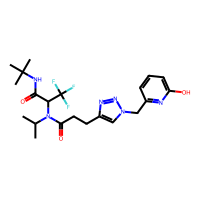
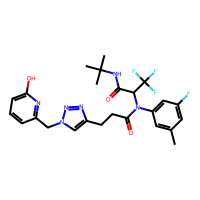
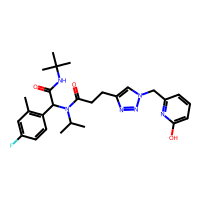
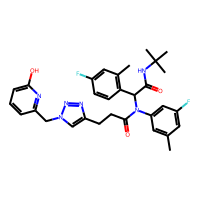
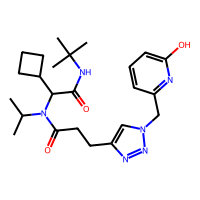
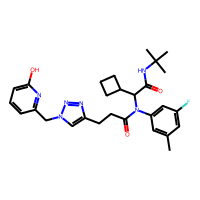
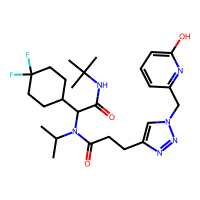
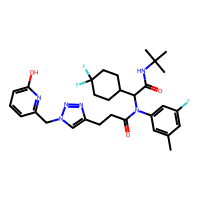
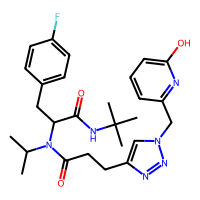
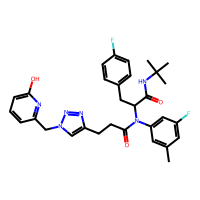
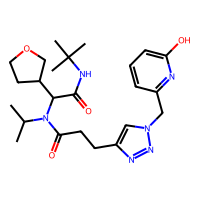
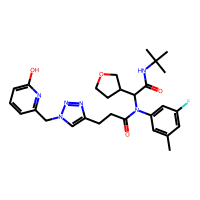
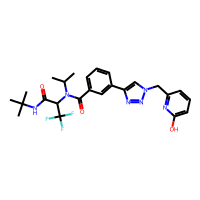
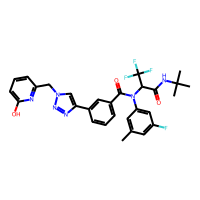
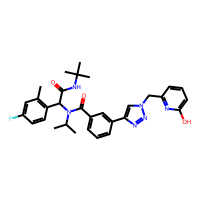
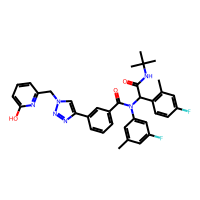
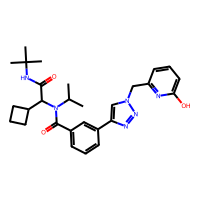
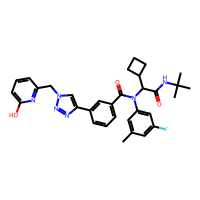
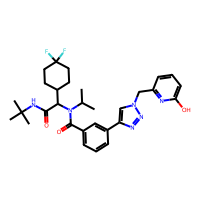
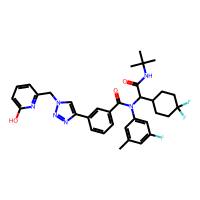
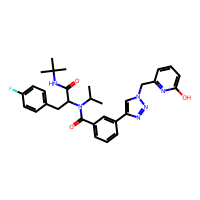
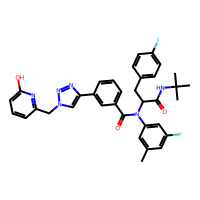
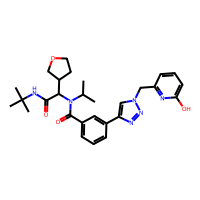
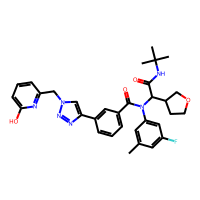
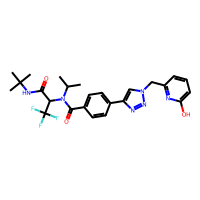
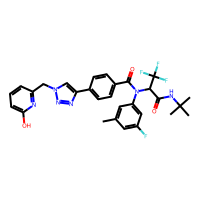
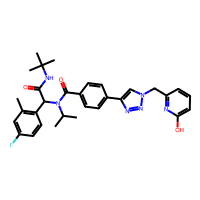
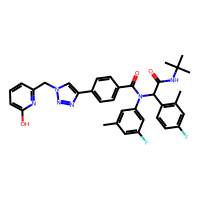
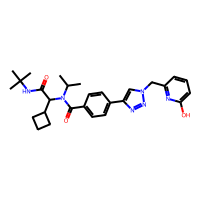
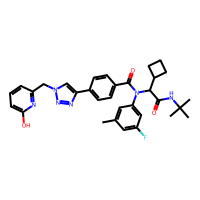
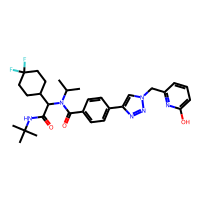
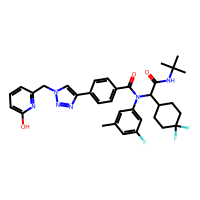
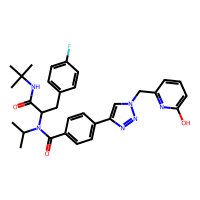
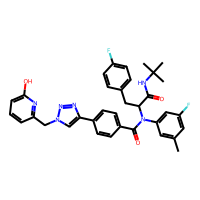
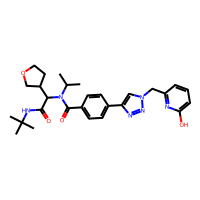
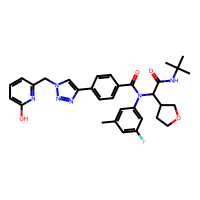

In [36]:
PandasTools.AddMoleculeColumnToFrame(df_triazole_ace_on_acid, 'triazole_smiles', 'triazole_mol')
df_triazole_ace_on_acid

In [31]:
# df = process('TS_ugi_sampling/results/ace_on_aldehyde_results.csv')
df_triazole_ace_on_aldehyde = pd.DataFrame(columns=['acid_cas', 'aldehyde_cas', 'amine_cas', 'nc_cas', 'triazole_smiles'])
for aldehyde_cas in [
    '38846-64-9',
    '63697-96-1',
]:
    for acid_cas in [
        '157431-09-9',
        '107496-54-8',
        '455-40-3',
    ]:
        for amine_cas in [
            '15572-56-2',
            '52215-41-5',
        ]:
            try:
                acid_mol = Chem.MolFromSmiles(df[df['cas'] == acid_cas]['smiles'].values[0])
            except:
                if acid_cas == '455-40-3':
                    acid_mol = Chem.MolFromSmiles('FC1=CC(C(O)=O)=CC(F)=C1')
                else:
                    print(acid_cas)
                    raise Exception
            aldehyde_mol = Chem.MolFromSmiles(df[df['cas'] == aldehyde_cas]['smiles'].values[0])
            amine_mol = Chem.MolFromSmiles(df[df['cas'] == amine_cas]['smiles'].values[0])
            nc_mol = Chem.MolFromSmiles(df[df['cas'] == '7188-38-7']['smiles'].values[0])
            azide_mol = Chem.MolFromSmiles('[N-]=[N+]=NCC1=CC=CC(O)=N1')
            prod = ugi_ace_on_aldehyde_click_rxn.RunReactants([acid_mol, aldehyde_mol, nc_mol, amine_mol , azide_mol])[0][0]
            df_triazole_ace_on_aldehyde.loc[len(df_triazole_ace_on_aldehyde)] = [acid_cas, aldehyde_cas, amine_cas, '7188-38-7', Chem.MolToSmiles(prod, kekuleSmiles=True, canonical=True)]

preds = make_predictions(args, [[smi] for smi in df_triazole_ace_on_aldehyde['triazole_smiles']], model_objects=mpnn_model)
df_triazole_ace_on_aldehyde['activity'] = [p[0] for p in preds]

Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 12


100%|██████████| 30/30 [00:29<00:00,  1.03it/s]

Saving predictions to ./preds.csv
Elapsed time = 0:00:30


,acid_cas,aldehyde_cas,amine_cas,nc_cas,triazole_smiles,activity,triazole_mol
0,157431-09-9,38846-64-9,15572-56-2,7188-38-7,CC(C)N(C(=O)[C@@H](C)N(C)C)C(C(=O)NC(C)(C)C)C1...,0.591894,
1,157431-09-9,38846-64-9,52215-41-5,7188-38-7,CC1=CC(N(C(=O)[C@@H](C)N(C)C)C(C(=O)NC(C)(C)C)...,0.659148,
2,107496-54-8,38846-64-9,15572-56-2,7188-38-7,CC(C)N(C(=O)C1CC(F)(F)C1)C(C(=O)NC(C)(C)C)C1=C...,0.549983,
3,107496-54-8,38846-64-9,52215-41-5,7188-38-7,CC1=CC(N(C(=O)C2CC(F)(F)C2)C(C(=O)NC(C)(C)C)C2...,0.611291,
4,455-40-3,38846-64-9,15572-56-2,7188-38-7,CC(C)N(C(=O)C1=CC(F)=CC(F)=C1)C(C(=O)NC(C)(C)C...,0.594450,
5,455-40-3,38846-64-9,52215-41-5,7188-38-7,CC1=CC(N(C(=O)C2=CC(F)=CC(F)=C2)C(C(=O)NC(C)(C...,0.661431,
6,157431-09-9,63697-96-1,15572-56-2,7188-38-7,CC(C)N(C(=O)[C@@H](C)N(C)C)C(C(=O)NC(C)(C)C)C1...,0.560136,
7,157431-09-9,63697-96-1,52215-41-5,7188-38-7,CC1=CC(N(C(=O)[C@@H](C)N(C)C)C(C(=O)NC(C)(C)C)...,0.622804,
8,107496-54-8,63697-96-1,15572-56-2,7188-38-7,CC(C)N(C(=O)C1CC(F)(F)C1)C(C(=O)NC(C)(C)C)C1=C...,0.490369,
9,107496-54-8,63697-96-1,52215-41-5,7188-38-7,CC1=CC(N(C(=O)C2CC(F)(F)C2)C(C(=O)NC(C)(C)C)C2...,0.546332,

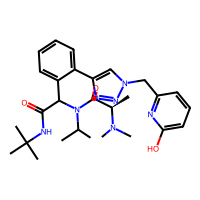
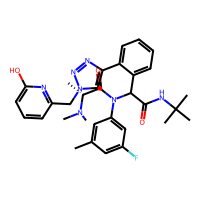
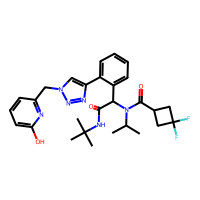
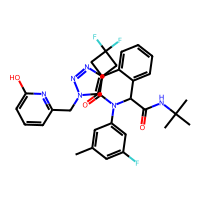
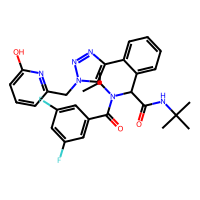
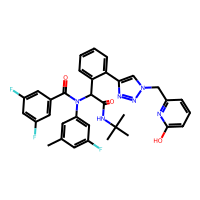
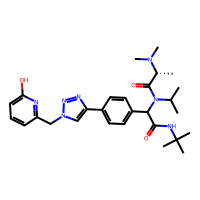
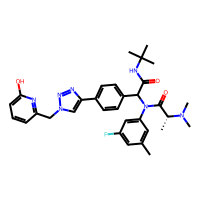
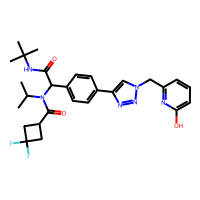
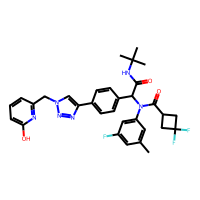
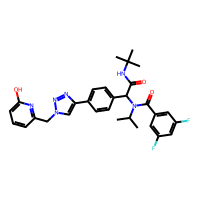
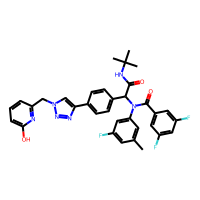

In [32]:
PandasTools.AddMoleculeColumnToFrame(df_triazole_ace_on_aldehyde, 'triazole_smiles', 'triazole_mol')
df_triazole_ace_on_aldehyde

In [39]:
df_triazole_ace_on_amine = pd.DataFrame(columns=['acid_cas', 'aldehyde_cas', 'amine_cas', 'nc_cas', 'triazole_smiles'])
for amine_cas in [
    '2450-71-7',
    '54060-30-9',
    '52670-38-9',
]:
    for acid_cas in [
        '157431-09-9',
        '107496-54-8',
        '455-40-3',
    ]:
        for aldehyde_cas in [
            '33953-86-5',
            '63082-45-1',
            '2987-17-9',
            '265108-36-9',
            '1736-67-0',
            '79710-86-4',
        ]:
            try:
                acid_mol = Chem.MolFromSmiles(df[df['cas'] == acid_cas]['smiles'].values[0])
            except:
                if acid_cas == '455-40-3':
                    acid_mol = Chem.MolFromSmiles('FC1=CC(C(O)=O)=CC(F)=C1')
                else:
                    print(acid_cas)
                    raise Exception
            aldehyde_mol = Chem.MolFromSmiles(df[df['cas'] == aldehyde_cas]['smiles'].values[0])
            amine_mol = Chem.MolFromSmiles(df[df['cas'] == amine_cas]['smiles'].values[0])
            nc_mol = Chem.MolFromSmiles(df[df['cas'] == '7188-38-7']['smiles'].values[0])
            azide_mol = Chem.MolFromSmiles('[N-]=[N+]=NCC1=CC=CC(O)=N1')
            try:
                prod = ugi_ace_on_amine_click_rxn.RunReactants([acid_mol, aldehyde_mol, nc_mol, amine_mol , azide_mol])[0][0]
            except:
                print(acid_cas, aldehyde_cas, amine_cas)
                raise Exception
            df_triazole_ace_on_amine.loc[len(df_triazole_ace_on_amine)] = [acid_cas, aldehyde_cas, amine_cas, '7188-38-7', Chem.MolToSmiles(prod, kekuleSmiles=True, canonical=True)]

preds = make_predictions(args, [[smi] for smi in df_triazole_ace_on_amine['triazole_smiles']], model_objects=mpnn_model)
df_triazole_ace_on_amine['activity'] = [p[0] for p in preds]

Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 54


100%|██████████| 30/30 [00:28<00:00,  1.07it/s]

Saving predictions to ./preds.csv
Elapsed time = 0:00:30


,acid_cas,aldehyde_cas,amine_cas,nc_cas,triazole_smiles,activity,triazole_mol
0,157431-09-9,33953-86-5,2450-71-7,7188-38-7,C[C@H](C(=O)N(CC1=CN(CC2=NC(O)=CC=C2)N=N1)C(C(...,0.555002,
1,157431-09-9,63082-45-1,2450-71-7,7188-38-7,CC1=C(C(C(=O)NC(C)(C)C)N(CC2=CN(CC3=NC(O)=CC=C...,0.604112,
2,157431-09-9,2987-17-9,2450-71-7,7188-38-7,C[C@H](C(=O)N(CC1=CN(CC2=NC(O)=CC=C2)N=N1)C(C(...,0.529821,
3,157431-09-9,265108-36-9,2450-71-7,7188-38-7,C[C@H](C(=O)N(CC1=CN(CC2=NC(O)=CC=C2)N=N1)C(C(...,0.541503,
4,157431-09-9,1736-67-0,2450-71-7,7188-38-7,C[C@H](C(=O)N(CC1=CN(CC2=NC(O)=CC=C2)N=N1)C(CC...,0.589785,
5,157431-09-9,79710-86-4,2450-71-7,7188-38-7,C[C@H](C(=O)N(CC1=CN(CC2=NC(O)=CC=C2)N=N1)C(C(...,0.561350,
6,107496-54-8,33953-86-5,2450-71-7,7188-38-7,CC(C)(C)NC(=O)C(N(CC1=CN(CC2=NC(O)=CC=C2)N=N1)...,0.480074,
7,107496-54-8,63082-45-1,2450-71-7,7188-38-7,CC1=C(C(C(=O)NC(C)(C)C)N(CC2=CN(CC3=NC(O)=CC=C...,0.523708,
8,107496-54-8,2987-17-9,2450-71-7,7188-38-7,CC(C)(C)NC(=O)C(C1CCC1)N(CC1=CN(CC2=NC(O)=CC=C...,0.448091,
9,107496-54-8,265108-36-9,2450-71-7,7188-38-7,CC(C)(C)NC(=O)C(C1CCC(F)(F)CC1)N(CC1=CN(CC2=NC...,0.459897,

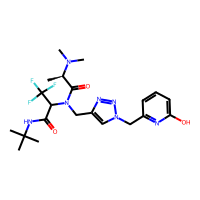
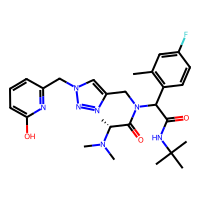
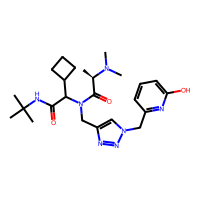
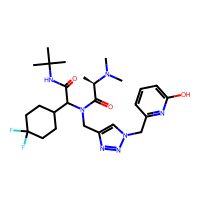
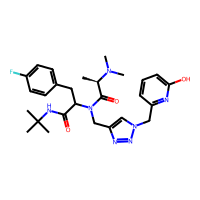
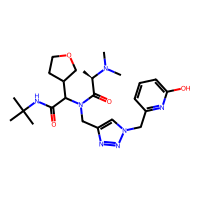
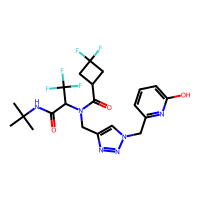
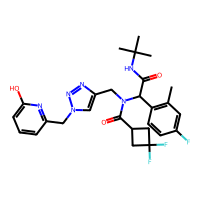
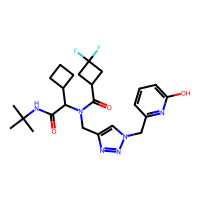
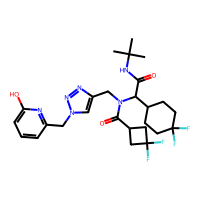
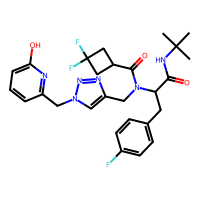
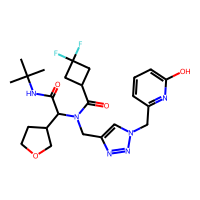
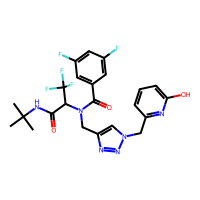
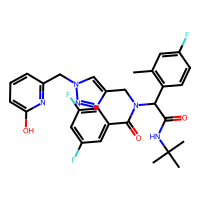
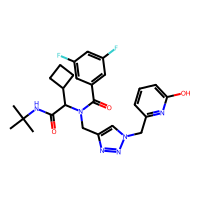
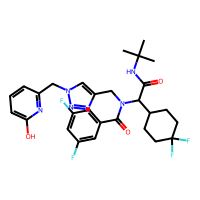
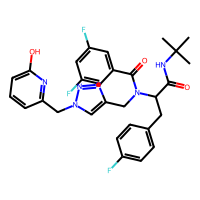
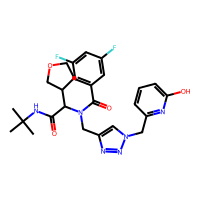
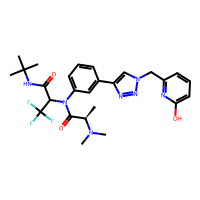
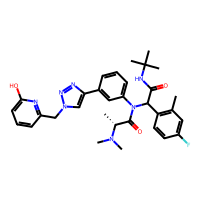
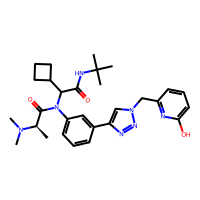
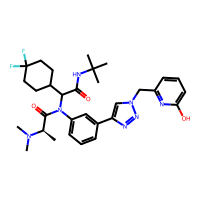
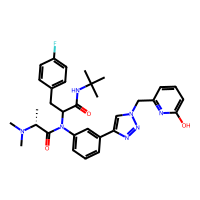
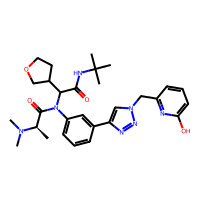
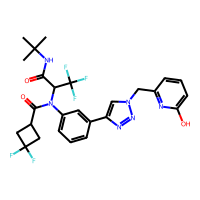
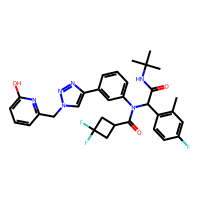
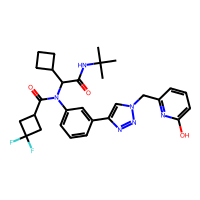
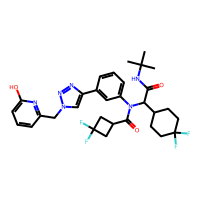
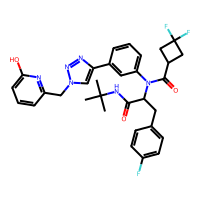
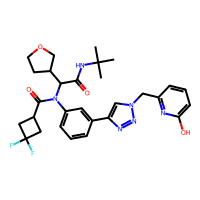
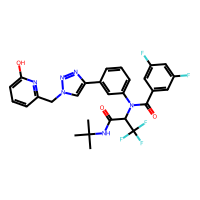
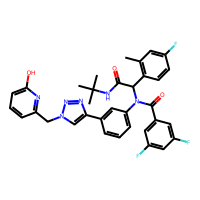
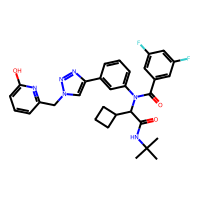
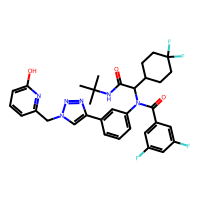
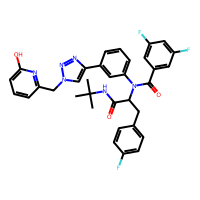
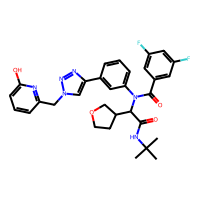
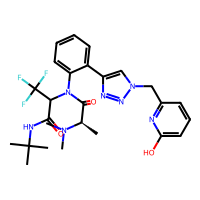
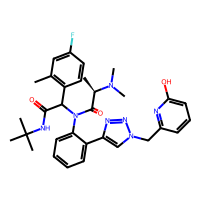
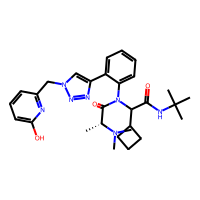
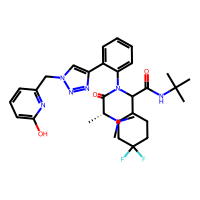
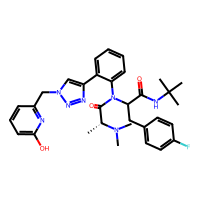
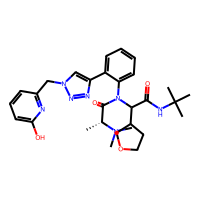
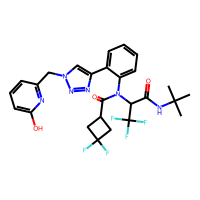
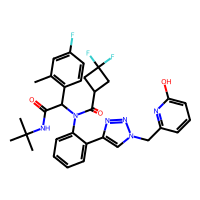
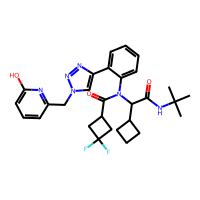
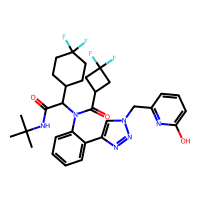
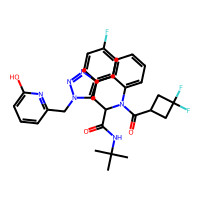
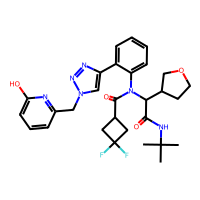
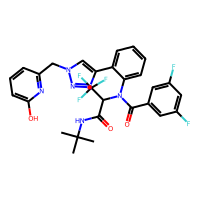
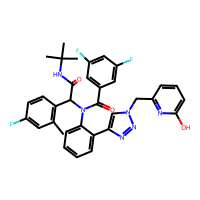
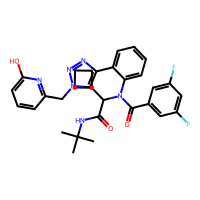
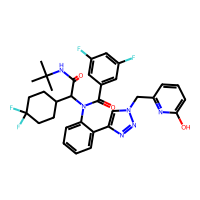
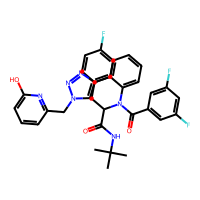
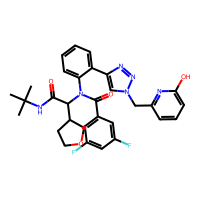

In [40]:
PandasTools.AddMoleculeColumnToFrame(df_triazole_ace_on_amine, 'triazole_smiles', 'triazole_mol')
df_triazole_ace_on_amine